In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df=pd.read_csv("/content/USA_Housing.csv")

df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.isnull()

df.corr()

<ipython-input-5-714538087202>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [6]:
cols=df.columns

df.columns=[col.lower() for col in cols]

df.columns


Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price', 'address'],
      dtype='object')

In [7]:
df.rename(columns={'avg. area income':'avg_area_income',
                   'avg. area house age':'avg_area_house_age',
                   'avg. area number of rooms':'avg_area_number_of_rooms',
                   'avg. area number of bedrooms':'avg_area_number_of_bedrooms',
                   'price':"price",
                   'address':"address"}, inplace=True)

df.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area population', 'price', 'address'],
      dtype='object')

In [ ]:
#df.drop('avg_area_number_of_bedrooms', axis=1, inplace=True)



,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,area population,price,address
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [12]:
df.corr()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area population,price
avg_area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
avg_area_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
avg_area_number_of_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
avg_area_number_of_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [13]:
#### ANOVA analysis between adress column and target price column

df_copy= pd.read_csv("/content/USA_Housing.csv")

df_copy['Address'].nunique()

#no need drop it out

5000

In [14]:
df.drop("address", axis=1,inplace=True)

KeyError: ignored

In [81]:
from sklearn.model_selection import train_test_split

X= df[["avg_area_income","avg_area_house_age","avg_area_number_of_rooms","area population"]]

y= df["price"]

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=101)




(4000, 4)

In [18]:
######### MODEL

model = LinearRegression()

lin_model= model.fit(X_train,y_train)
lin_model

LinearRegression()

In [22]:
######### Predicting ########

y_test
y_train

y_pred_train = lin_model.predict(X_train)

y_pred_test = lin_model.predict(X_test)

In [60]:
######## coeff and intercept

model.coef_


coefs_=model.coef_.reshape(1,-1)

intercept_ = np.array(model.intercept_).reshape(1,-1)

all_coef = np.hstack((coefs_, intercept_))

all_coef.round(decimals=1)





array([[ 2.1600000e+01,  1.6630420e+05,  1.2119390e+05,  1.4600000e+01,
        -2.6232598e+06]])

In [62]:
##############-------------- Evaluation metrics----------------------------##############################

R2_test =r2_score(y_test, y_pred_test)
R2_train = r2_score(y_train,y_pred_train)

print(f"R2 square for test sample:{R2_test} ")
print(f"R2 square for train sample:{R2_train}")



R2 square for test sample:0.916686918164804 
R2 square for train sample:0.9215997650849891


In [72]:
#########------ Adjusted R2------ ############

n= X_test.shape[0]  #sample size of observations of dataframe
p = X_test.shape[1] #parameters size features of
adj_R2_test = 1- (1-R2_test)*(n-1)/(n-p-1)


n2= X_train.shape[0]

p ## is same for all (tran and test) cuz its number of columns in dataframe


adj_R2_train= 1-(1-R2_train)*(n2-1)/(n2-p-1)


print(f"adjusted R2 for test data: {adj_R2_test}")
print(f"adjusted R2 for train data: {adj_R2_train}")

adjusted R2 for test data: 0.9166035008112768
adjusted R2 for train data: 0.9212845882612102


In [73]:
########## RMSE #######################

RMSE_test = mean_squared_error(y_test,y_pred_test)**0.5

RMSE_train = mean_squared_error(y_train,y_pred_train)**0.5


print(f"RMSE_test: {RMSE_test}")
print(f"RMSE_train: {RMSE_train} ")

RMSE_test: 101534.49707869551
RMSE_train: 100226.58290340197 


In [74]:
###### Mean absolute error #####

from sklearn.metrics import mean_absolute_error

MAE_test = mean_absolute_error(y_train,y_pred_train)

MAE_train = mean_absolute_error(y_test, y_pred_test)




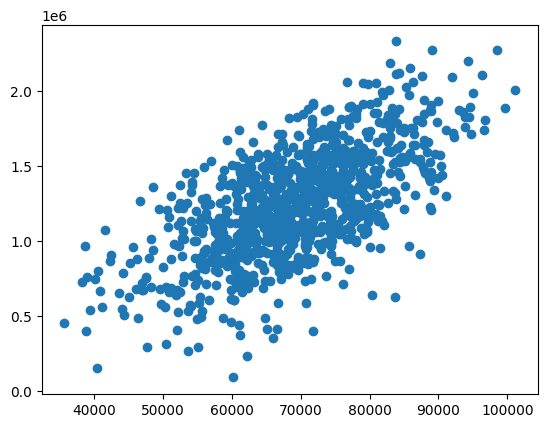

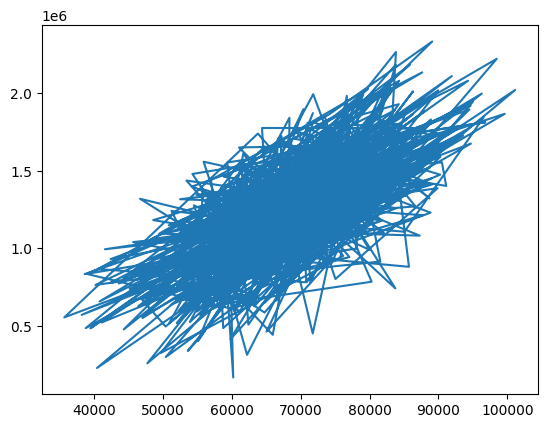

In [109]:
######-- Vizualization--######

import matplotlib.pyplot as plt
#plt.figure(figsize=(5,5))

plt.scatter(X_train.iloc[:,0], y_train)
plt.show()
plt.plot(X_train.iloc[:,0], y_pred_train)
plt.show()

In [118]:
new_input = np.array([120,120,75,68]).reshape(1,-1)
lin_model.predict(new_input)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26426378.61758853])